Integrantes  
Bryann Alfaro  
Raul Jimenez  
Donaldo Garcia

## Paso 1 - Exploracion de datos

In [160]:
#Load dataframe
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

df = pd.read_csv('dataset_pishing.csv')

#Mostrar 5 observaciones
df.head()

,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,0,1,0,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,1,0,0,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,1,0,1,0,0,0,0,0,1,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,0,0,0,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,0,1,0,0,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [161]:
#Mostrar cantidad de observaciones de columna status
df['status'].value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64

Se puede observar que el dataset esta balanceado por medio de la columna status

## Derivacion de caracteristicas

f1 

In [162]:
#Obtener len de las url
df['len_url'] = df['url'].apply(len)
#show url and len url 
df[['url','len_url']].head()


,url,len_url
0,http://www.crestonwood.com/router.php,37
1,http://shadetreetechnology.com/V4/validation/a...,77
2,https://support-appleld.com.secureupdate.duila...,126
3,http://rgipt.ac.in,18
4,http://www.iracing.com/tracks/gateway-motorspo...,55


f2

In [163]:
from urllib.parse import urlparse
def get_hostname(url):
    return urlparse(url).hostname

#Get hostname len in a for
for i in range (0, len(df)):
    df.loc[int(i),'hostname_len'] = len(get_hostname(df.loc[i,'url']))

df[['url','hostname_len']].head()


,url,hostname_len
0,http://www.crestonwood.com/router.php,19.0
1,http://shadetreetechnology.com/V4/validation/a...,23.0
2,https://support-appleld.com.secureupdate.duila...,50.0
3,http://rgipt.ac.in,11.0
4,http://www.iracing.com/tracks/gateway-motorspo...,15.0


f3

In [164]:
#Show ip column
df[['url','ip']].head()

,url,ip
0,http://www.crestonwood.com/router.php,0
1,http://shadetreetechnology.com/V4/validation/a...,1
2,https://support-appleld.com.secureupdate.duila...,1
3,http://rgipt.ac.in,0
4,http://www.iracing.com/tracks/gateway-motorspo...,0


f4 - f20

In [165]:
# list of special characters to count in url
special_characters = ['.','-','@','|','_','~','%','/','?','&','=','*',':',',',';','$','%20']
# count every special character in url column of df and create a new column for each special character with the count
for special_character in special_characters:
    df[f'{special_character}_url_count'] = df['url'].apply(lambda x: x.count(special_character))
# show the new columns with the string "_count" and the url column
df[[f'{special_character}_url_count' for special_character in special_characters] + ['url']].head()

,._url_count,-_url_count,@_url_count,|_url_count,__url_count,~_url_count,%_url_count,/_url_count,?_url_count,&_url_count,=_url_count,*_url_count,:_url_count,",_url_count",;_url_count,$_url_count,%20_url_count,url
0,3,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,http://www.crestonwood.com/router.php
1,1,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,http://shadetreetechnology.com/V4/validation/a...
2,4,1,0,0,2,0,0,5,1,2,3,0,1,0,0,0,0,https://support-appleld.com.secureupdate.duila...
3,2,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,http://rgipt.ac.in
4,2,2,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,http://www.iracing.com/tracks/gateway-motorspo...


f25

In [166]:
df.columns.sort_values()
df[['http_in_path','status','url']].head()

,http_in_path,status,url
0,0,legitimate,http://www.crestonwood.com/router.php
1,0,phishing,http://shadetreetechnology.com/V4/validation/a...
2,0,phishing,https://support-appleld.com.secureupdate.duila...
3,0,legitimate,http://rgipt.ac.in
4,0,legitimate,http://www.iracing.com/tracks/gateway-motorspo...


In [167]:
#count https
def count_https(url):
    return 1 if urlparse(url).scheme == 'https' else 0



df['https'] = df['url'].apply(count_https)
df[['url','https']].head()

,url,https
0,http://www.crestonwood.com/router.php,0
1,http://shadetreetechnology.com/V4/validation/a...,0
2,https://support-appleld.com.secureupdate.duila...,1
3,http://rgipt.ac.in,0
4,http://www.iracing.com/tracks/gateway-motorspo...,0


f26

In [168]:
#count digits in url and calculate the ratio
def count_digits(url):
    #COUNT DIGITS AND DIVIDE BY THE LENGTH OF THE URL
    return sum(c.isdigit() for c in url)/len(url)

df['url_digits_ratio'] = df['url'].apply(count_digits)
df[['url','url_digits_ratio']].head()

,url,url_digits_ratio
0,http://www.crestonwood.com/router.php,0.000000
1,http://shadetreetechnology.com/V4/validation/a...,0.220779
2,https://support-appleld.com.secureupdate.duila...,0.150794
3,http://rgipt.ac.in,0.000000
4,http://www.iracing.com/tracks/gateway-motorspo...,0.000000


f27

In [169]:
#Count digits in hostname and calculate the ratio
def count_digits_hostname(url):
    #COUNT DIGITS AND DIVIDE BY THE LENGTH OF THE HOSTNAME

    return sum(c.isdigit() for c in get_hostname(url))/len(get_hostname(url))
df['digits_hostname_ratio'] = df['url'].apply(count_digits_hostname)
df[['url','digits_hostname_ratio']].head()

,url,digits_hostname_ratio
0,http://www.crestonwood.com/router.php,0.0
1,http://shadetreetechnology.com/V4/validation/a...,0.0
2,https://support-appleld.com.secureupdate.duila...,0.0
3,http://rgipt.ac.in,0.0
4,http://www.iracing.com/tracks/gateway-motorspo...,0.0


visualizacion de columnas nuevas

In [170]:
df.head()

,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,...,=_url_count,*_url_count,:_url_count,",_url_count",;_url_count,$_url_count,%20_url_count,https,url_digits_ratio,digits_hostname_ratio
0,http://www.crestonwood.com/router.php,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.000000,0.0
1,http://shadetreetechnology.com/V4/validation/a...,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.220779,0.0
2,https://support-appleld.com.secureupdate.duila...,1,0,1,0,0,0,0,0,1,...,3,0,1,0,0,0,0,1,0.150794,0.0
3,http://rgipt.ac.in,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.000000,0.0
4,http://www.iracing.com/tracks/gateway-motorspo...,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.000000,0.0


## Preprocesamiento

In [171]:
#Convert status to 0 and 1
#https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/
df["status"] = np.where(df["status"] == "phishing", 1, 0)
#show status
df['status'].value_counts()


0    5715
1    5715
Name: status, dtype: int64

In [172]:
#Delete URL column
df = df.drop(['url'], axis=1)
df.head()

,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,...,=_url_count,*_url_count,:_url_count,",_url_count",;_url_count,$_url_count,%20_url_count,https,url_digits_ratio,digits_hostname_ratio
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.000000,0.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.220779,0.0
2,1,0,1,0,0,0,0,0,1,0,...,3,0,1,0,0,0,0,1,0.150794,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.000000,0.0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.000000,0.0


Reporte pandas

In [173]:
# #Make a pandas profile
# import pandas_profiling
# report = pandas_profiling.ProfileReport(df)
# report.to_file("Reporte Phishing.html")

In [174]:
df['status'].value_counts()

0    5715
1    5715
Name: status, dtype: int64

In [175]:
#Get the correlation matrix
corr = df.corr()
corr
#show status correlation with the rest of the columns
corr['status'].sort_values(ascending=False).head(15)


status                   1.000000
google_index             0.731171
url_digits_ratio         0.356421
domain_in_title          0.342807
phish_hints              0.335393
ip                       0.321698
?_url_count              0.294319
len_url                  0.248482
/_url_count              0.242270
hostname_len             0.238322
=_url_count              0.233386
digits_hostname_ratio    0.224335
shortest_word_host       0.223084
prefix_suffix            0.214681
longest_word_path        0.212709
Name: status, dtype: float64

In [176]:
new_df = df[['status','google_index','url_digits_ratio','domain_in_title','phish_hints','ip','?_url_count','len_url','/_url_count','hostname_len']]



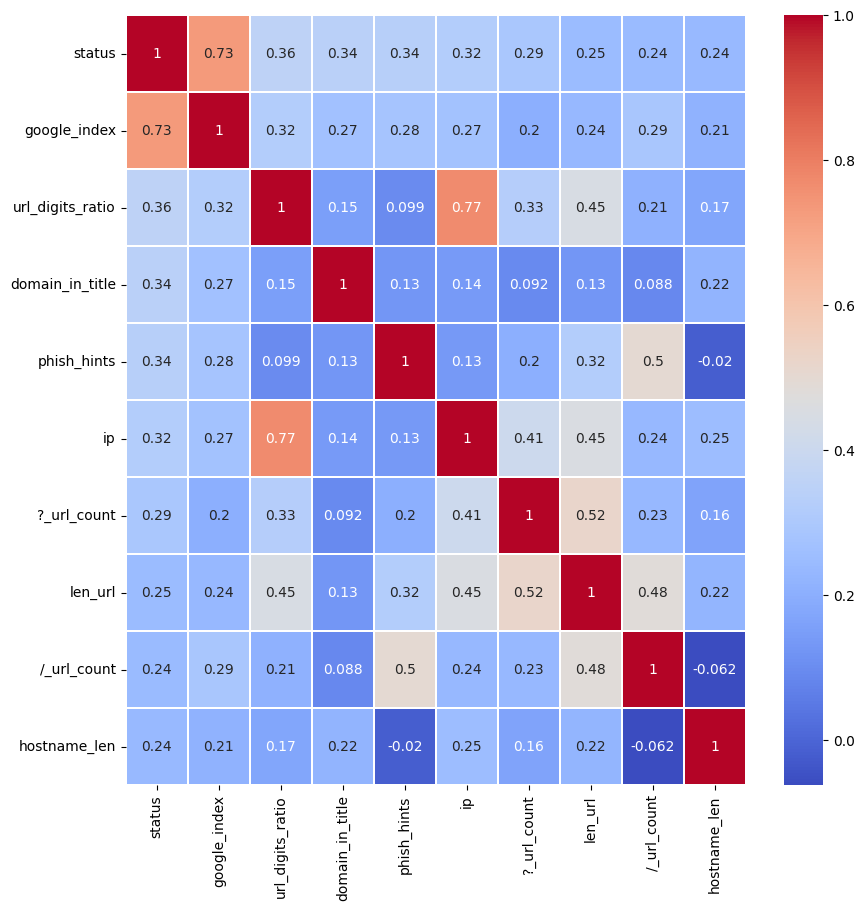

In [177]:
#Show correlation matrix of new_df
corr = new_df.corr()
#Visualize
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.2)
fig=plt.gcf()

In [178]:
#Delete duplicates in new_df
new_df = new_df.drop_duplicates()

In [179]:
new_df.shape

(7912, 10)

## Parte 2 - implementacion

In [180]:
# reomve the status column from the dataframe
target = new_df['status']
x = new_df.drop(['status'], axis=1)

In [181]:
# separate data into 55% training, validation 15% and test 30%
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size=0.3, random_state=42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

# store all the data in a csv file
x_train.to_csv('data/x_train.csv', index=False)
x_validation.to_csv('data/x_validation.csv', index=False)
x_test.to_csv('data/x_test.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
y_validation.to_csv('data/y_validation.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)

### Random forest

In [182]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(x_train, y_train)
y_predict = rf.predict(x_validation)
# get metrics of the model
print('Accuracy: ', accuracy_score(y_validation, y_predict))
print('Precision: ', precision_score(y_validation, y_predict))
print('Recall: ', recall_score(y_validation, y_predict))
print('F1: ', f1_score(y_validation, y_predict))

Accuracy:  0.8640192539109507
Precision:  0.8627049180327869
Recall:  0.9014989293361885
F1:  0.881675392670157


### Decision tree classifier

In [183]:
# create a decision tree classifier
clf = tree.DecisionTreeClassifier()
# train the model
clf = clf.fit(x_train, y_train)

In [184]:
# predict the target with the validation data
y_pred = clf.predict(x_validation)
# get metrics of the model
print('Accuracy: ', accuracy_score(y_validation, y_pred))
print('Precision: ', precision_score(y_validation, y_pred))
print('Recall: ', recall_score(y_validation, y_pred))
print('F1: ', f1_score(y_validation, y_pred))

Accuracy:  0.8375451263537906
Precision:  0.8443983402489627
Recall:  0.8715203426124197
F1:  0.8577449947312961


In [185]:
# predict the target with the test data
y_pred = clf.predict(x_test)
# get metrics of the model
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

Accuracy:  0.8184498736310025
Precision:  0.8445408532176428
Recall:  0.8439306358381503
F1:  0.8442356342609325


## Discusión

1. ¿Cuál es el impacto de clasificar un sitio legítimo como Pishing?

R/ El impacto de este seria que le quitariamos subscriptores o visitas al sitio legal, debido a que por clasificarlo mal las personas tendrian miedo de entrar ahi por que podrian ser afectados.

2. ¿Cuál es el impacto de clasificar un sitio de Pishing como legítimo? 

3. En base a las respuestas anteriores, ¿Qué métrica elegiría para comparar modelos similares 
de clasificación de pishing? 

4. ¿Qué modelo es mejor para la clasificación de Pishing? Justifique
 
5. En base a las métricas obtenidas ¿es necesaria la intervención de una persona humana para 
tomar la decisión final? 